In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./Dataset/train.csv')

/var/folders/60/y3ghgqm10bgcylfwrkwb7y040000gs/T/ipykernel_44484/2556825173.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('./Dataset/train.csv')


In [3]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
drop_columns = ['ID', 'Name', 'SSN']
train_df.drop(labels=drop_columns, inplace=True, axis=1)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

In [6]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
train_df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<BarContainer object of 3 artists>

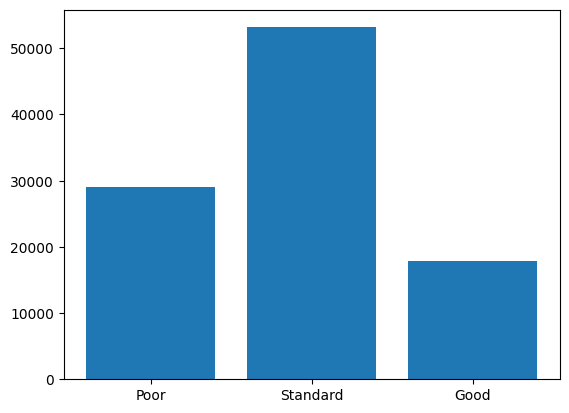

In [8]:
# Bar plot showing distribution of Credit_Score
x = ['Poor', 'Standard', 'Good'] # want to observe dist in this order
y = [train_df['Credit_Score'].value_counts().to_dict()[label] for label in x]

plt.bar(x, y)

Standard Credit Score is by far the biggest, almost bell-shaped curve except heavy right tail.

In [23]:
income_debt_features = [
    'Annual_Income', 'Num_of_Loan',
    'Monthly_Inhand_Salary', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Outstanding_Debt'
]

drop_columns = [col for col in train_df.columns if col not in income_debt_features]

df_income_debt = train_df.drop(labels=drop_columns, axis=1)

print(df_income_debt.info())

df_income_debt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            100000 non-null  object 
 1   Monthly_Inhand_Salary    84998 non-null   float64
 2   Num_of_Loan              100000 non-null  object 
 3   Outstanding_Debt         100000 non-null  object 
 4   Total_EMI_per_month      100000 non-null  float64
 5   Amount_invested_monthly  95521 non-null   object 
dtypes: float64(2), object(4)
memory usage: 4.6+ MB
None


,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly
0,19114.12,1824.843333,4,809.98,49.574949,80.41529543900253
1,19114.12,NaN,4,809.98,49.574949,118.28022162236736
2,19114.12,NaN,4,809.98,49.574949,81.699521264648
3,19114.12,NaN,4,809.98,49.574949,199.4580743910713
4,19114.12,1824.843333,4,809.98,49.574949,41.420153086217326


In [30]:
bad_columns = []
for feature in income_debt_features:
    try:
        df_income_debt = df_income_debt.astype({feature: 'float64'})
    except ValueError as e:
        print(f"Error in converting feature {feature} to float64.")
        bad_columns.append(feature)
bad_columns

Error in converting feature Annual_Income to float64.
Error in converting feature Num_of_Loan to float64.
Error in converting feature Amount_invested_monthly to float64.
Error in converting feature Outstanding_Debt to float64.


['Annual_Income', 'Num_of_Loan', 'Amount_invested_monthly', 'Outstanding_Debt']